In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [49]:
df = pd.read_csv("C:\\Users\\LAPTOPINN\\Downloads\\train.csv")

In [51]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [53]:
#First 5 Rows
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [55]:
# check missing values
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [57]:
# Fill Age with median
df['Age'] = df['Age'].fillna(df['Age'].median())

In [59]:
# Fill Cabin missing with 'Unknown'
df['Cabin'] = df['Cabin'].fillna('Unknown')

In [61]:
# Fill Embarked missing with most common value
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [63]:
# 3. Set correct data types
df['Pclass'] = df['Pclass'].astype('category')
df['Sex'] = df['Sex'].astype('category')
df['Embarked'] = df['Embarked'].astype('category')
df['Survived'] = pd.to_numeric(df['Survived'], errors='coerce')  # numeric

In [65]:
# Drop duplicates
df = df.drop_duplicates()

In [67]:
df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.0,891,891,891.000000,891.000000,891.000000,891,891.000000,891,891
unique,NaN,NaN,3.0,891,2,NaN,NaN,NaN,681,NaN,148,3
top,NaN,NaN,3.0,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,Unknown,S
freq,NaN,NaN,491.0,1,577,NaN,NaN,NaN,7,NaN,687,646
mean,446.000000,0.383838,NaN,NaN,NaN,29.361582,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,NaN,NaN,NaN,13.019697,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,NaN,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,NaN,NaN,NaN,22.000000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,NaN,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,NaN,NaN,NaN,35.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [69]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Sex          891 non-null    category
 5   Age          891 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        891 non-null    object  
 11  Embarked     891 non-null    category
dtypes: category(3), float64(2), int64(4), object(3)
memory usage: 65.8+ KB


In [73]:
#Survival Rate by Gender
print("\nSurvival Rate by Gender (%):")
print(df.groupby('Sex', observed=True)['Survived'].mean() * 100)


Survival Rate by Gender (%):
Sex
female    74.203822
male      18.890815
Name: Survived, dtype: float64


In [75]:
#Survival Rate by Passenger Class
print("\nSurvival Rate by Passenger Class (%):")
print(df.groupby('Pclass', observed=True)['Survived'].mean() * 100)


Survival Rate by Passenger Class (%):
Pclass
1    62.962963
2    47.282609
3    24.236253
Name: Survived, dtype: float64


In [77]:
#Survival Rate by Embarkation Port
print("\nSurvival Rate by Embarkation Port (%):")
print(df.groupby('Embarked', observed=True)['Survived'].mean() * 100)


Survival Rate by Embarkation Port (%):
Embarked
C    55.357143
Q    38.961039
S    33.900929
Name: Survived, dtype: float64


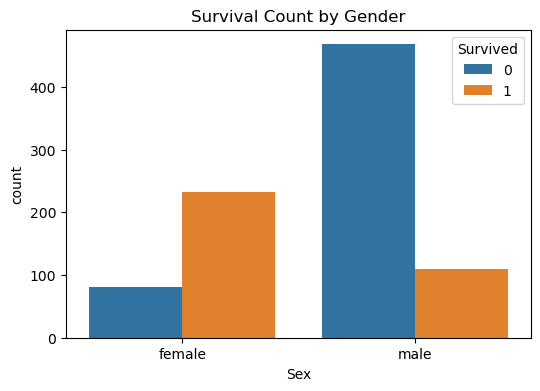

In [79]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Sex', hue='Survived')
plt.title('Survival Count by Gender')
plt.show()

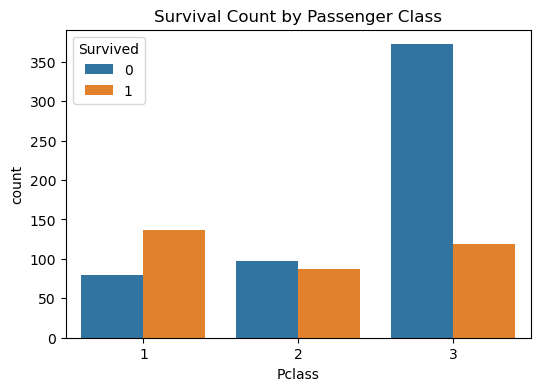

In [81]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Pclass', hue='Survived')
plt.title('Survival Count by Passenger Class')
plt.show()

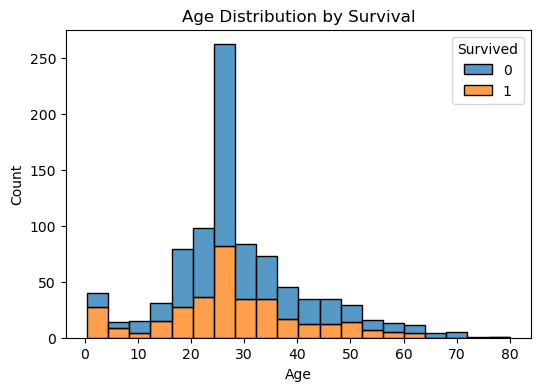

In [43]:
plt.figure(figsize=(6,4))
sns.histplot(data=df, x='Age', hue='Survived', multiple='stack', bins=20)
plt.title('Age Distribution by Survival')
plt.show()

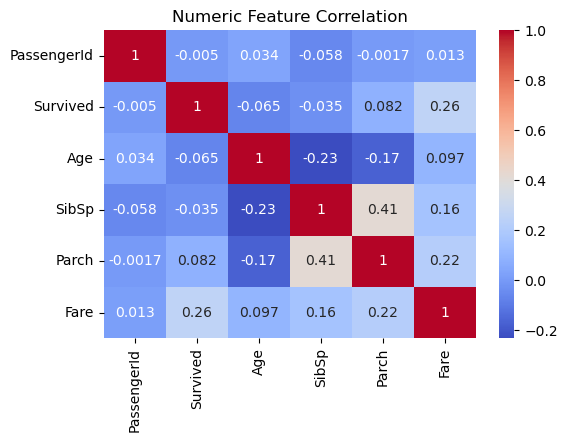

In [83]:
# Correlation heatmap
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Numeric Feature Correlation')
plt.show()